## Berikut ini adalah data iklim di Kota Banjarmasin selama 3 bulan dari bulan Januari 2020 s/d Maret 2020. Lakukan pengolahan data sebagaimana berikut:
## 1. Gantikan data yang tidak valid (8888 atau 9999) dengan NaN
## 2. Gantikan data yang kosong (NaN) dengan data pada baris sebelumnya (hint: gunakan metode 'ffill')
## 3. Hapus kolom Temperatur mininum, Temperatur maksimum, dan Arah angin saat kecepatan maksimum
## 4. Berikan minimal 1 visualisasi data yang menarik

## Lakukan analisa data kemudian jawablah pertanyaan berikut:
## 1. Pada tanggal berapa terjadi curah hujan tertinggi?
## 2. Pada bulan apa penyinaran matahari yang paling banyak?
## 3. Selama bulan Maret, ke arah manakah angin paling banyak bertiup?

***
### **Keterangan data:**
#### 8888: data tidak terukur
#### 9999: Tidak Ada Data (tidak dilakukan pengukuran)
#### Tn: Temperatur minimum	 (°C)
#### Tx: Temperatur maksimum (°C)
#### Tavg: Temperatur rata-rata (°C)
#### RH_avg: Kelembapan rata-rata (%)
#### RR: Curah hujan (mm)
#### ss: Lamanya penyinaran matahari (jam)
#### ff_x: Kecepatan angin maksimum (m/s)
#### ddd_x: Arah angin saat kecepatan maksimum (°)
#### ff_avg: Kecepatan angin rata-rata (m/s)
#### ddd_car: Arah angin terbanyak (°)
#### C: Calm (No Wind)


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import locale
locale.setlocale(locale.LC_TIME, "id_ID") # set locale Indonesia

%matplotlib inline

In [8]:
# Load Data
df = pd.read_excel('data_iklim_baru.xlsx')
df.head(15)

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,2020-01-01,23.2,30.5,26.5,88.0,94.1,4.4,3,30,2,S
1,2020-01-02,23.2,30.6,26.6,89.0,8.2,2.5,5,60,2,NE
2,2020-01-03,23.6,31.5,26.5,87.0,3.4,1.0,6,250,2,NE
3,2020-01-04,24.0,32.7,26.9,88.0,0.0,2.6,4,360,2,E
4,2020-01-05,25.0,32.4,26.8,88.0,26.5,5.8,4,20,2,N
5,2020-01-06,23.6,32.6,26.9,86.0,18.4,0.5,4,10,2,N
6,2020-01-07,23.8,31.5,28.0,84.0,0.0,4.6,7,40,2,NE
7,2020-01-08,25.9,NaN,27.1,86.0,1.0,0.5,4,50,2,S
8,2020-01-09,NaN,32.0,26.2,86.0,1.0,0.0,5,340,2,NE
9,2020-01-10,NaN,31.4,25.9,94.0,11.7,2.3,12,250,3,S


In [9]:
# 1.Gantikan data yang tidak valid (8888 atau 9999) dengan NaN
df = df.replace([8888,9999], None)
df.head(15)
df.isnull().sum()

Tanggal     0
Tn         14
Tx          3
Tavg        5
RH_avg      5
RR          9
ss          5
ff_x        0
ddd_x       0
ff_avg      0
ddd_car     0
dtype: int64

In [10]:
# 2.Gantikan data yang kosong (NaN) dengan data pada baris sebelumnya (hint: gunakan metode 'ffill')
# df.ffill()
df = df.fillna(method='ffill')
df.head(15)

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,2020-01-01,23.2,30.5,26.5,88.0,94.1,4.4,3,30,2,S
1,2020-01-02,23.2,30.6,26.6,89.0,8.2,2.5,5,60,2,NE
2,2020-01-03,23.6,31.5,26.5,87.0,3.4,1.0,6,250,2,NE
3,2020-01-04,24.0,32.7,26.9,88.0,0.0,2.6,4,360,2,E
4,2020-01-05,25.0,32.4,26.8,88.0,26.5,5.8,4,20,2,N
5,2020-01-06,23.6,32.6,26.9,86.0,18.4,0.5,4,10,2,N
6,2020-01-07,23.8,31.5,28.0,84.0,0.0,4.6,7,40,2,NE
7,2020-01-08,25.9,31.5,27.1,86.0,1.0,0.5,4,50,2,S
8,2020-01-09,25.9,32.0,26.2,86.0,1.0,0.0,5,340,2,NE
9,2020-01-10,25.9,31.4,25.9,94.0,11.7,2.3,12,250,3,S


In [11]:
# 3. Hapus kolom Temperatur mininum, Temperatur maksimum, dan Arah angin saat kecepatan maksimum
df = df.drop(columns=['Tn', 'Tx', 'ddd_x'])
df.head()

,Tanggal,Tavg,RH_avg,RR,ss,ff_x,ff_avg,ddd_car
0,2020-01-01,26.5,88.0,94.1,4.4,3,2,S
1,2020-01-02,26.6,89.0,8.2,2.5,5,2,NE
2,2020-01-03,26.5,87.0,3.4,1.0,6,2,NE
3,2020-01-04,26.9,88.0,0.0,2.6,4,2,E
4,2020-01-05,26.8,88.0,26.5,5.8,4,2,N


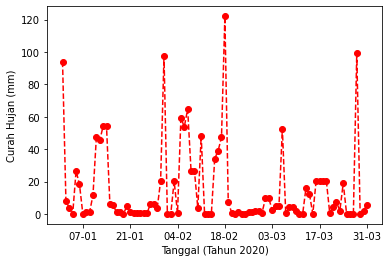

In [12]:
# 4. Berikan minimal 1 visualisasi data yang menarik
tanggal = df['Tanggal']
curah_hujan = df['RR']
plt.xlabel('Tanggal (Tahun 2020)')
plt.ylabel('Curah Hujan (mm)')
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
plt.gca().xaxis.set_major_formatter(DateFormatter("%d-%m"))

plt.plot(tanggal, curah_hujan, 'ro--')
plt.show()

Text(0.5, 1.0, 'Statistik Curah Hujan')

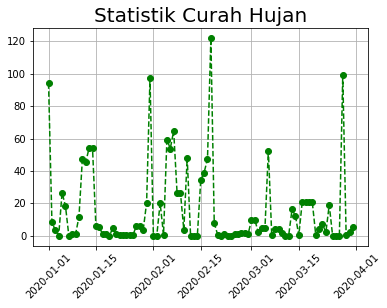

In [13]:
df = df.sort_values('Tanggal', ascending=True)
plt.plot(df['Tanggal'], df['RR'], color='green', marker='o', linestyle='dashed')
plt.xticks(rotation=45)
plt.grid()
plt.title("Statistik Curah Hujan", size=20)

In [15]:
# 5. Pada tanggal berapa terjadi curah hujan tertinggi?
highest_RR = df['RR'].argmax() # No baris dimana terdapat nilai RR (Curah Hujan) Tertinggi
date_of_highest_RR = df.iloc[highest_RR]['Tanggal']

print("Curah hujan tertinggi terjadi pada tanggal {}.".format(date_of_highest_RR.strftime("%d %B %Y")))

Curah hujan tertinggi terjadi pada tanggal 18 Februari 2020.


In [17]:
# 6. Pada bulan apa penyinaran matahari yang paling banyak?
df['bulan'] = df['Tanggal'].apply(lambda row: int(row.strftime('%m'))) # menambahkan kolom bulan
highest_sunshine_month = df.groupby('bulan')['ss'].sum().sort_values(ascending=False).index[0]

nama_bulan = datetime.datetime.strptime(str(highest_sunshine_month), "%m")
print("Penyinaran matahari yang paling banyak terjadi pada bulan {}.".format(nama_bulan.strftime("%B")))

Penyinaran matahari yang paling banyak terjadi pada bulan Maret.


In [18]:
# 7. Selama bulan Maret, ke arah manakah angin paling banyak bertiup?
angin_maret = df[df['bulan'] == 3]['ddd_car'].value_counts().index[0]
print("Selama bulan Maret, angin paling banyak bertiup ke arah {}.".format(angin_maret))

Selama bulan Maret, angin paling banyak bertiup ke arah NE.
